# 1. Import and Install Dependencies


In [2]:
!pip install tensorflow==2.13.0 
!pip install opencv-python mediapipe sklearn matplotlib


In [3]:

# %%
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


c:\Users\micha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Keypoints using MP Holistic


In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results


In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # FACEMESH_TESSELATION Draw face connections full; FACEMESH_CONTOURS Draw face connection outline
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


# %%
mp_drawing.draw_landmarks??

# %%
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
                                     color=RED_CO

In [241]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            #print(results)
            
            # # Draw landmarks
            
            draw_styled_landmarks(image, results)
            
            # Show to screen
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

In [12]:
draw_landmarks(frame,results)


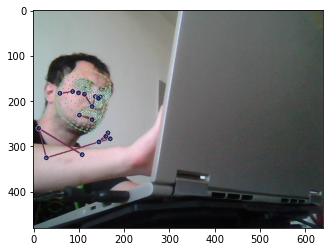

In [13]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


In [14]:

len(results.right_hand_landmarks.landmark)


AttributeError: 'NoneType' object has no attribute 'landmark'

# 3. Extract Keypoint Values

In [15]:
results.right_hand_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [53]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [54]:
test

array([ 3.18366230e-01,  2.66637397e+00, -4.30892467e-01,  2.14920467e-04])

In [55]:
pose = np.array(pose).flatten()
len(pose)

132

In [56]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [67]:
pose

array([ 5.45767009e-01,  3.54947239e-01, -9.13377464e-01,  9.99919832e-01,
        5.61098099e-01,  3.23032379e-01, -8.20391059e-01,  9.99726653e-01,
        5.70974290e-01,  3.29769909e-01, -8.20384383e-01,  9.99695003e-01,
        5.80373526e-01,  3.36324573e-01, -8.20330262e-01,  9.99581575e-01,
        5.27385652e-01,  3.08489382e-01, -8.45075488e-01,  9.99851465e-01,
        5.11597335e-01,  3.04054588e-01, -8.44969749e-01,  9.99879956e-01,
        4.96370703e-01,  3.00648898e-01, -8.45190406e-01,  9.99861360e-01,
        5.72366595e-01,  3.65020216e-01, -3.67323220e-01,  9.99677956e-01,
        4.51140553e-01,  3.30737591e-01, -4.80242968e-01,  9.99906838e-01,
        5.51338792e-01,  4.13762718e-01, -7.60300159e-01,  9.99856651e-01,
        5.08715034e-01,  4.04401422e-01, -7.91972160e-01,  9.99929309e-01,
        6.05899572e-01,  7.02114820e-01, -1.21979117e-01,  9.99782264e-01,
        2.68387765e-01,  5.95752418e-01, -3.59215409e-01,  9.99839604e-01,
        8.35204422e-01,  

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [72]:
res = extract_keypoints(results)


In [85]:
res[:10]

array([ 0.54576701,  0.35494724, -0.91337746,  0.99991983,  0.5610981 ,
        0.32303238, -0.82039106,  0.99972665,  0.57097429,  0.32976991])

In [73]:
np.save('0',res)

In [86]:
res2 = np.load('0.npy')

In [87]:
type(res2)

numpy.ndarray

In [88]:
res2.dtype

dtype('float64')

In [89]:
res == res2

array([ True,  True,  True, ...,  True,  True,  True])

# 4. Setup Folders for Collection

In [18]:
# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('MP_Data') 

# # Actions that we try to detect
# actions = np.array(['hello', 'thanks', 'iloveyou'])

# # Thirty videos worth of data
# no_sequences = 30

# # Videos are going to be 30 frames in length
# sequence_length = 30

In [145]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data2') 

# Actions that we try to detect
actions = np.array(['distress','allGood','nothing'])

# Sixty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [146]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# 5. Collect Keypoint Values for Training and Testing

In [147]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [144]:
    cap.release()
    cv2.destroyAllWindows()

In [33]:
a = 'abc'
a[:-1]

'ab'

In [41]:
path = r'C:\Afeka\Final Project\RS_LSTM\MP_Data\iloveyou' 
for f in os.listdir(path):
    if f.__contains__('_'):
        f = f[:-1]
        os.rename(os.path.join(path,str(f+ '_')),os.path.join(path,str(int(f) + 30)))

In [23]:
path = r'C:\Afeka\Final Project\RS_LSTM\MP_Data\iloveyou'
for f in os.listdir(path):
    os.rename(os.path.join(path,f),os.path.join(path,f + '_'))

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [148]:
label_map = {label:num for num, label in enumerate(actions)}


In [149]:
label_map

{'distress': 0, 'allGood': 1, 'nothing': 2}

In [150]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [112]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [151]:
len(labels)

90

In [152]:
len(sequences[0])

30

In [154]:
np.array(sequences).shape

(90, 30, 1662)

In [155]:
np.array(labels).shape

(90,)

In [156]:
X = np.array(sequences)

In [157]:
X.shape

(90, 30, 1662)

In [158]:
y = to_categorical(labels).astype(int)

In [159]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.05)

In [163]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(85, 30, 1662)
(5, 30, 1662)
(85, 3)
(5, 3)


# 7. Build and Train LSTM Neural Network

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [217]:
log_dir = os.path.join('RS_TRAIN','Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [223]:
model = Sequential()
model.add(LSTM(30, return_sequences=True, activation='relu', input_shape=(30,1662)))

model.add(LSTM(64, return_sequences=True, activation='relu'))

model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [224]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [225]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback],)


Epoch 1/1000
3/3 [==============================] - 5s 134ms/step - loss: 4.3364 - categorical_accuracy: 0.3294
Epoch 2/1000
3/3 [==============================] - 0s 120ms/step - loss: 7.9343 - categorical_accuracy: 0.2941
Epoch 3/1000
3/3 [==============================] - 0s 121ms/step - loss: 2.9591 - categorical_accuracy: 0.3176
Epoch 4/1000
3/3 [==============================] - 0s 119ms/step - loss: 2.4371 - categorical_accuracy: 0.5176
Epoch 5/1000
3/3 [==============================] - 0s 119ms/step - loss: 3.3709 - categorical_accuracy: 0.6118
Epoch 6/1000
3/3 [==============================] - 0s 123ms/step - loss: 3.9047 - categorical_accuracy: 0.5882
Epoch 7/1000
3/3 [==============================] - 0s 114ms/step - loss: 13.1952 - categorical_accuracy: 0.5882
Epoch 8/1000
3/3 [==============================] - 0s 118ms/step - loss: 7.7660 - categorical_accuracy: 0.6118
Epoch 9/1000
3/3 [==============================] - 0s 122ms/step - loss: 5.5401 - categorical_accuracy

In [226]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 30, 30)            203160    
                                                                 
 lstm_45 (LSTM)              (None, 30, 64)            24320     
                                                                 
 lstm_46 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_47 (LSTM)              (None, 64)                49408     
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dense_45 (Dense)            (None, 3)                 387       
                                                                 
Total params: 384411 (1.47 MB)
Trainable params: 3844

# 8. Make Predictions

In [228]:
res = model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [229]:
res[0]

array([0., 0., 1.], dtype=float32)

In [230]:
np.argmax(res[0])

2

In [231]:
actions[np.argmax(res[0])]

'nothing'

In [205]:
actions[np.argmax(y_test[0])]

'nothing'

# 9. Save Weights

In [242]:
model.save('action.h5')

c:\Users\micha\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [233]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [234]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 51ms/step


In [235]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [236]:
print(ytrue)
print(yhat)

[1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0]
[1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0]


In [237]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[55,  0],
        [ 0, 30]],

       [[57,  0],
        [ 0, 28]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [137]:
multilabel_confusion_matrix??

Signature:
multilabel_confusion_matrix(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    labels=None,
    samplewise=False,
)
Source:   
@_deprecate_positional_args
def multilabel_confusion_matrix(y_true, y_pred, *, sample_weight=None,
                                labels=None, samplewise=False):
    """Compute a confusion matrix for each class or sample.

    .. versionadded:: 0.21

    Compute class-wise (default) or sample-wise (samplewise=True) multilabel
    confusion matrix to evaluate the accuracy of a classification, and output
    confusion matrices for each class or sample.

    In multilabel confusion matrix :math:`MCM`, the count of true negatives
    is :math:`MCM_{:,0,0}`, false negatives is :math:`MCM_{:,1,0}`,
    true positives is :math:`MCM_{:,1,1}` and false positives is
    :math:`MCM_{:,0,1}`.

    Multiclass data will be treated as if binarized under a one-vs-rest
    transformation. Returned confusion matrices will be in the order of
    sorted unique

In [238]:
accuracy_score(ytrue, yhat)
# only 5 eneties in test

1.0

# 11. Test in Real Time

In [239]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [240]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [169]:
res[np.argmax(res)] > threshold

False

In [159]:
model.predict(X_test)
#model.predict(X_test[0]) error

1/1 [==============================] - 0s 33ms/step


array([[1.41698204e-03, 9.33364749e-01, 6.52182773e-02],
       [1.45813543e-03, 9.31842029e-01, 6.66999072e-02],
       [9.99772727e-01, 1.00213504e-10, 2.27251716e-04],
       [8.30990437e-04, 1.23982271e-03, 9.97929215e-01],
       [8.13273888e-04, 1.17153104e-03, 9.98015165e-01]], dtype=float32)

In [161]:
X_test[0].shape

(30, 1662)

In [162]:
np.expand_dims(X_test[0],axis =0)

array([[[ 0.58544099,  0.41928777, -0.77497715, ...,  0.52259964,
          0.97309136, -0.03320815],
        [ 0.59019405,  0.41930372, -0.81995076, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.59286398,  0.41851076, -0.80464774, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.58509338,  0.42078239, -0.54458791, ...,  0.54447633,
          0.7830621 , -0.05965425],
        [ 0.58463353,  0.42004973, -0.5954634 , ...,  0.54955655,
          0.81928068, -0.0656544 ],
        [ 0.58441502,  0.41942227, -0.58116591, ...,  0.54836529,
          0.8282783 , -0.0631806 ]]])

In [163]:
model.predict(np.expand_dims(X_test[0], axis =0))

1/1 [==============================] - 0s 29ms/step


array([[0.00141698, 0.93336475, 0.06521828]], dtype=float32)